# Overview

In this project, we will be using the iris data set to hone our pattern recognition skills and also learn classification techniques.

Data source: https://archive.ics.uci.edu/ml/datasets/Iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style = 'darkgrid')
plt.rcParams.update({'figure.figsize':(12,9)})

In [3]:
iris = pd.read_csv('C:/JupyterP/Learning/Data/Practice/iris/iris.csv',header=None)

# First Look

In [4]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


One of the first things we notice is that the data has no headers (we did import the csv file while passing the argument header=None, but the original data set came without headers to begin with.)

To improve readability and also give us an easier time while working with the data, let's assign appropriate column names.

Appropriate column names will be used as assigned in the data documentation using the link at the top of the page.

From the link, we see that the columns correspond accordingly:
0. Sepal Length (cm)
1. Sepal Width (cm)
2. Petal Length (cm)
3. Petal Width (cm)
4. Class (Setosa, Versicolour, Iris Virginica)

We can also insert a header row when we read the csv by passing the a list of column names into the names argument of the read_csv function.

In [5]:
iris.rename(columns={
    0:'sepal_length',
    1:'sepal_width',
    2:'petal_length',
    3:'petal_width',
    4:'class',
},inplace=True)

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.shape

(150, 5)

From above, we can see that our data is rather clean. Let's explore the data set further and see if we can find any interesting relationships to predict the class of an iris.

We can also see that we have 150 observations of 5 columns.

# Exploratory Data Analysis

### Visualization

In [10]:
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

One of the first things we can do is create a boxplot for each of the measurements and sort it by class and compare.

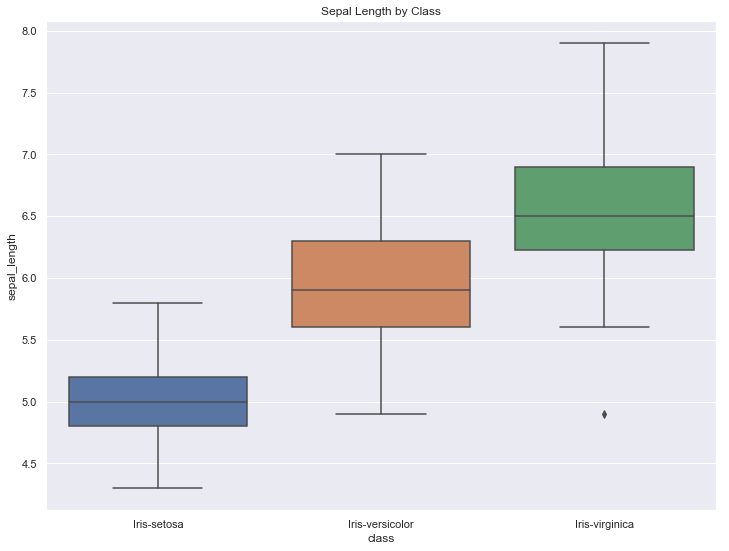

In [11]:
sns.boxplot(x='class', y='sepal_length', data=iris).set_title('Sepal Length by Class');

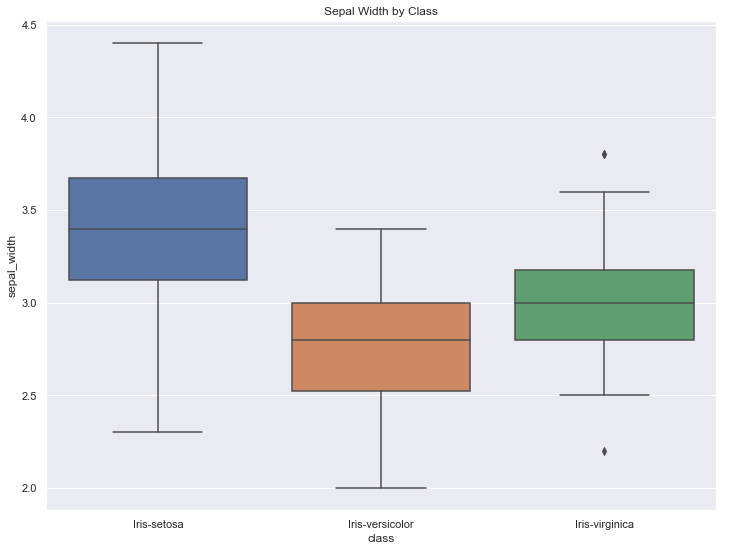

In [12]:
sns.boxplot(x='class', y='sepal_width' , data=iris).set_title('Sepal Width by Class');

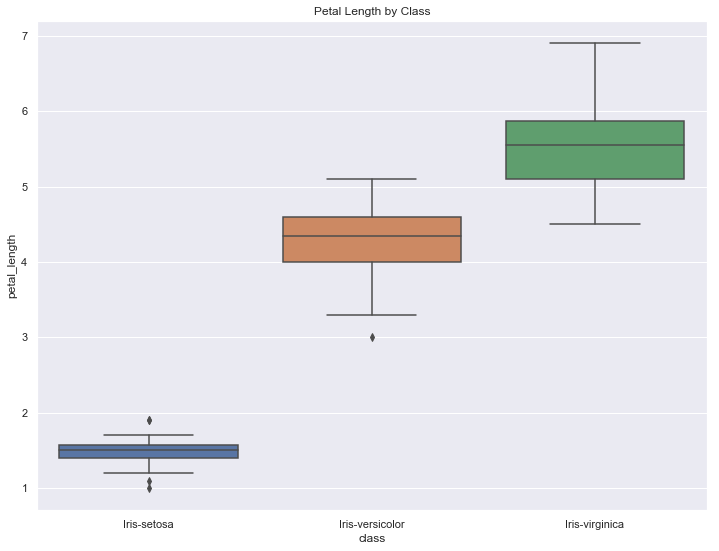

In [13]:
sns.boxplot(x='class', y='petal_length', data=iris).set_title('Petal Length by Class');

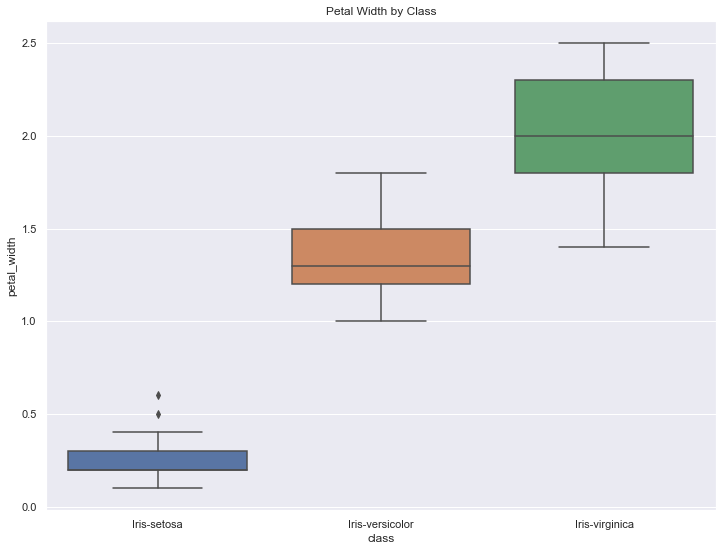

In [14]:
sns.boxplot(x='class', y='petal_width' , data=iris).set_title('Petal Width by Class');

From the above, we can see that there is indeed a distinction between the three classes depending on the paramter we use. For example, a flower with a small petal length and width probably belongs to the class iris setosa.

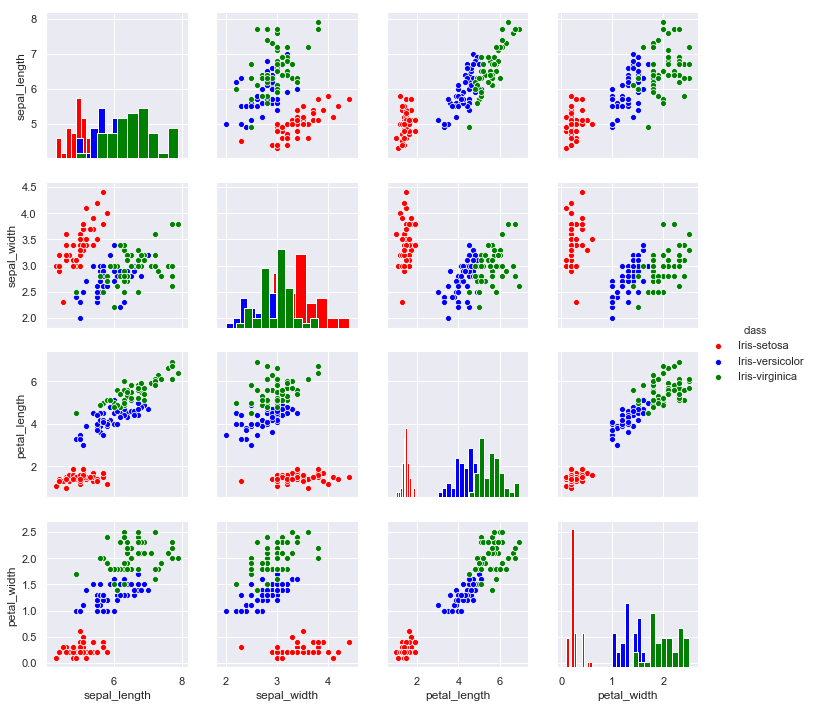

In [15]:
from pandas.plotting import scatter_matrix

pal = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
sns.pairplot(data=iris, hue='class', palette = pal, diag_kind='hist');

The scatter matrix is a useful function that plots every numeric variable in a scatter plot against eachother. When plotted against itself, it shows the histogram of that variable.

One thing to note is that a diagonally distributed scatter plot may suggest some sort of linear relationship between the two variables.

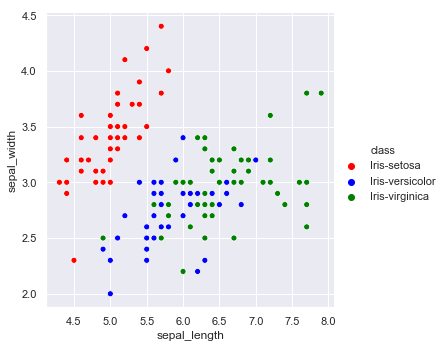

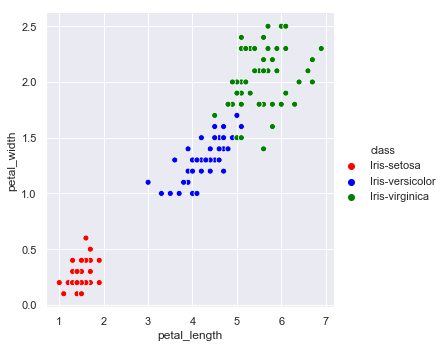

In [16]:
sns.relplot(x='sepal_length',y='sepal_width',hue='class',palette=pal,data=iris);
sns.relplot(x='petal_length',y='petal_width',hue='class',palette=pal,data=iris);

Here, we can clearly see the relationships between lengths and widths for sepals and petals by the class of the iris. Note that these graphs are a closer look at some of the graphs shown above.

Iris-setosa has wide but short sepals and skinny and short petals on average.
<br>Iris-versicolor has skinny and short sepals, with medium-sized petals on average.
<br>Iris-virginica has long and semi-wide sepals, with long and wide petals on average.

# Multinomial Logistic Regression

### Data Preparation

We want to split our data into a train and test data set so we can test the model's performance against another data set.

In [17]:
train = iris.sample(frac=0.8)
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.854167,3.064167,3.735833,1.192500
std,0.861589,0.445858,1.801857,0.771244
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.750000,3.000000,4.350000,1.300000
75%,6.500000,3.400000,5.125000,1.800000
max,7.900000,4.400000,6.700000,2.500000


### Building and Testing the Model

In [18]:
X = train[['sepal_length','sepal_width','petal_length','petal_width']]
Y = train['class']

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,Y)
preds = lr.predict(X)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train['class'],preds)
print(accuracy)

0.95


We can see from our train data set, using a simple logistic regression model has about 96% accuracy for predicting a flower's class.

How about when we use all the data?

In [20]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
Y = iris['class']

lr.fit(X,Y)
preds = lr.predict(X)
accuracy = accuracy_score(iris['class'],preds)
print(accuracy)

0.96


This tells us that a logistic regression performs well when predicting a flower's class.

# Going Further: Model Selection

This part of the project will be done using guidance from an outside source.

Source: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

### Model Comparison and Selection

In [21]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [22]:
array = iris.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'

There are times when a model we use initially (like the model above) perform well enough to be chosen. However, it is good practice to examine a multitude of options and select the model that works best for our needs. This doesn't mean that the best performing model will be the best model to select; there may be cases where a simple model will work perfectly for what we want to achieve even if it performs slightly worse.

For now, we will be examining and comparing the following 6 machine learning algorithms:
 - Logistic Regression (LR) (Linear)
 - Linear Discriminant Analysis (LDA) (Linear)
 - K-Nearest Neighbors (KNN) (Non-Linear)
 - Classification and Regression Trees (CART) (Non-Linear)
 - Guassian Naive Bayes (NB) (Non-Linear)
 - Support Vector Machines (SVM) (Non-Linear)

In [23]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate Each Model
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


Text(0.5,1,'Visualization of Algorithm Comparison')

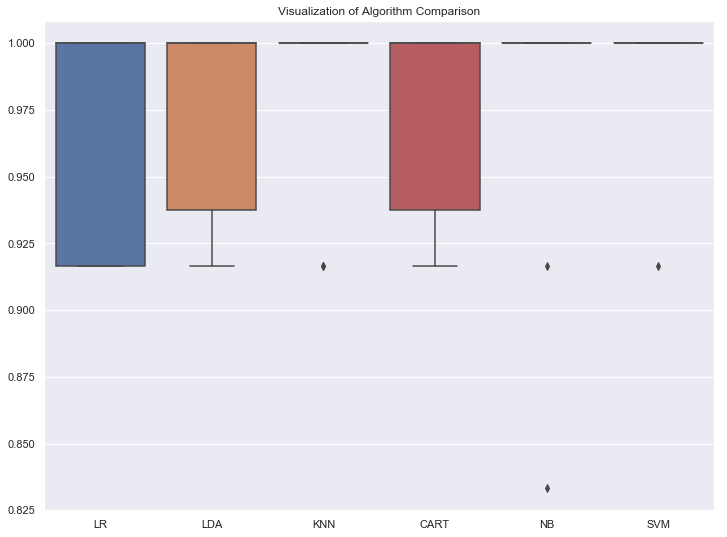

In [24]:
# Compare Algorithms
sns.boxplot(x=names, y=results).set_title('Visualization of Algorithm Comparison')

From the above, we can see that SVM yields the largest estimated accuracy score. Thus SVM is the most accurate model that we tested.

Now we want to get an idea of the accuracy of the model on our validation set.

### Predictions

In [25]:
svm = SVC()
svm.fit(X_train, Y_train)
preds = svm.predict(X_validation)
print('Accuracy:',accuracy_score(Y_validation, preds))
print('Confusion Matrix:\n',confusion_matrix(Y_validation, preds))
print('Classification Report:\n',classification_report(Y_validation, preds))

Accuracy: 0.9333333333333333
Confusion Matrix:
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



From the above, we can see that our accuracy is 93.33%

The confusion matrix provides an indication of the three errors made.

The classification report provides a breakdown of each class by precision, recall, f1-score and support.

In [26]:
# Compare to results from Logistic Regression
lr.fit(X_train, Y_train)
preds = lr.predict(X_validation)
print('Accuracy:',accuracy_score(Y_validation, preds))
print('Confusion Matrix:\n',confusion_matrix(Y_validation, preds))
print('Classification Report:\n',classification_report(Y_validation, preds))

Accuracy: 0.8
Confusion Matrix:
 [[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

    avg / total       0.83      0.80      0.80        30



Compared to Support Vector Machines, Logistic Regression performs worse in every aspect compared to SVM. Although our Logistic Regression model had high accuracy initially, it's best to check using cross-validation scores to prevent overfitting our data and to ensure that we chose a good model has good accuracy.